<a href="https://colab.research.google.com/github/LalithaJanneti/Support-Vector-Machine/blob/main/Email_Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from wordcloud import WordCloud

Load Dataset
Dataset: SMS spam Collection

In [5]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


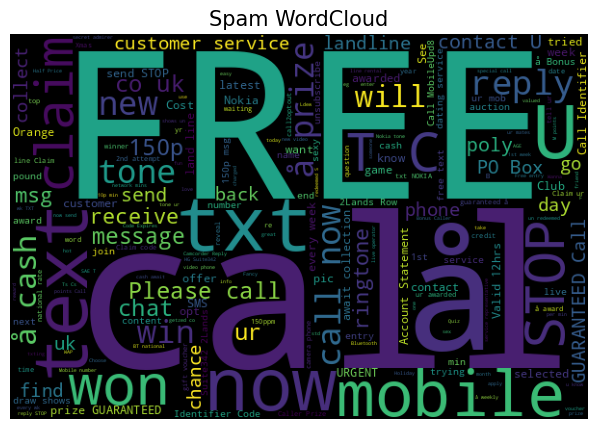

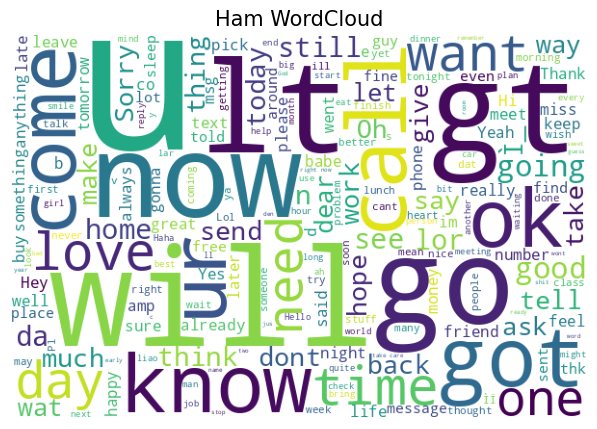

In [10]:
df=pd.read_csv("spam.csv",encoding="latin-1")

#keep only useful columns
df=df[['v1','v2']]
df.columns=['label','message']

#Visualize WordClouds fro spam and ham
spam_words="".join(df[df['label']=='spam']['message'])
ham_words="".join(df[df['label']=='ham']['message'])

#spam WordCloud
plt.figure(figsize=(10,5))
wc_spam=WordCloud(width=600,height=400,background_color="black").generate(spam_words)
plt.imshow(wc_spam)
plt.axis("off")
plt.title("Spam WordCloud",fontsize=15)
plt.show()

#Ham wordCloud
plt.figure(figsize=(10,5))
wc_ham=WordCloud(width=600,height=400,background_color="white").generate(ham_words)
plt.imshow(wc_ham)
plt.axis("off")
plt.title("Ham WordCloud",fontsize=15)
plt.show()

In [11]:
#encode labels: ham=0,spam=1
df['label']=df['label'].map({'ham':0,'spam':1})

#train test split
X_train,X_test,y_train,y_test=train_test_split(df['message'],df['label'],test_size=0.2,random_state=42)

#TF-IDF Vectorizer
vectorizer=TfidfVectorizer(stop_words="english",max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf=vectorizer.transform(X_test)

#train SVM model
svm_model=LinearSVC()
svm_model.fit(X_train_tfidf,y_train)

#make predictions
y_pred=svm_model.predict(X_test_tfidf)


In [12]:
# 📌 Step 8: Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.9748878923766816

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.85      0.90       150

    accuracy                           0.97      1115
   macro avg       0.97      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115


Confusion Matrix:
 [[959   6]
 [ 22 128]]


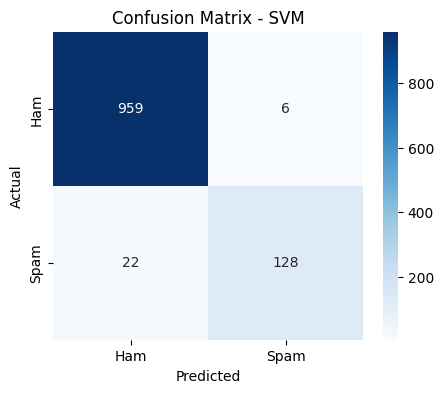

In [13]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [14]:
# ==========================
# Try My Own Messages
# ==========================
def predict_message(msg):
    msg_tfidf = vectorizer.transform([msg])
    pred = svm_model.predict(msg_tfidf)[0]
    return "SPAM 🚫" if pred == 1 else "HAM ✅"

# Test with custom examples
print(predict_message("Congratulations! You won a free iPhone, click here now!"))
print(predict_message("Hi mom, I’ll call you after class."))


SPAM 🚫
HAM ✅
